In [1]:
# Import libraries
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

In [2]:
# Now create the data
x1 , x2 = make_regression(n_samples = 200 , bias = 30 , n_features = 1 , noise = 10 , random_state = 10)

In [3]:
print(x1.shape , x2.shape)

(200, 1) (200,)


In [4]:
X = np.concatenate([x1,x2.reshape(-1,1)] , axis = 1)

In [5]:
print(X.shape)

(200, 2)


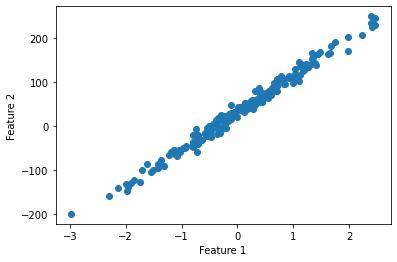

In [6]:
# Now we will plot the data 
plt.scatter(X[:,0] , X[:,1])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [7]:
# Center data around mean
mean = X.mean(axis = 0)
print(mean)

[ 0.07430692 37.54875338]


In [8]:
X_centered = X - mean
print(X_centered.mean(axis = 0))
# it is almost 0

[ 9.99200722e-18 -1.37134748e-14]


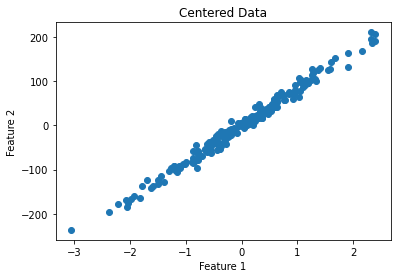

In [10]:
# Now plot it
plt.scatter(X_centered[:,0] , X_centered[:,1])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Centered Data")
plt.show()

In [11]:
# Principal Components
eigenvalues , eigenvectors = np.linalg.eig(X_centered.T.dot(X_centered))
print(eigenvalues)
print(eigenvectors)
# columns is eigenvectors
# each column is one eigen vector

[2.73007085e+00 1.34985430e+06]
[[-0.9999304 -0.0117977]
 [ 0.0117977 -0.9999304]]


In [12]:
# Name them differently
eigen_vector1 = eigenvectors[:,1]
eigen_val1 = eigenvalues[1]
eigen_vector2 = eigenvectors[:,0]
eigen_val2 = eigenvalues[0]

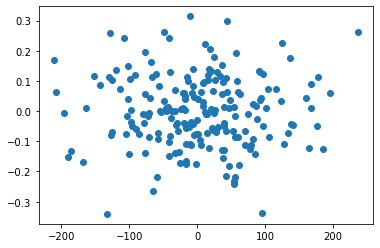

In [13]:
# taking projection on eigenvector1 and 2
f1 = X_centered.dot(eigen_vector1)
f2 = X_centered.dot(eigen_vector2)
plt.scatter(f1 , f2)
plt.show()

In [36]:
# var of the transformed matrix is same as the scaled eigen value
n = len(X)
print(f1.var() , f2.var())
print(eigen_val1/n , eigen_val2 / n)

6749.271499837241 0.013650354244156561
6749.271499837242 0.013650354243582115


# Doing same using PCA

In [14]:
pca = PCA() # making instance

In [15]:
pca.fit(X_centered) # computing eigen vectors of matrix

PCA()

In [16]:
pca.explained_variance_ # variance explained by each vector

array([6.78318744e+03, 1.37189490e-02])

In [17]:
pca.n_components_ # number of PCs

2

In [18]:
X_ = pca.transform(X_centered) # projecting data on eigen vectors

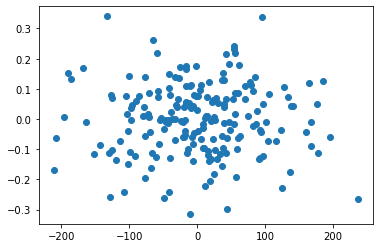

In [20]:
plt.scatter(X_[:,0] , X_[:,1])
plt.show()

In [22]:
X_.var(axis = 0)

array([6.74927150e+03, 1.36503542e-02])

In [23]:
# Now how to reduce dimension how to choose how much should be left

In [25]:
# finding cumulative frequency
np.cumsum(pca.explained_variance_)

array([6783.18743702, 6783.20115597])

In [28]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.99999798, 1.        ])

In [30]:
# Select number of components
n_components = np.argmax(cumsum >= 0.95) + 1
n_components

1

In [34]:
pca.explained_variance_ratio_ = pca.explained_variance_ / np.sum(pca.explained_variance_)

In [33]:
pca.explained_variance_ratio_

array([9.99997978e-01, 2.02248889e-06])